In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [21]:
lrpd = pd.read_csv("../data/lrpd-clean.csv")
lrpd = lrpd.set_index("INCIDENT_NUMBER")

In [22]:
lrpd.head()

,INCIDENT_DATE,LOCATION_DISTRICT,OFFENSE_DESCRIPTION,WEAPON_TYPE,INCIDENT_LOCATION,ZIP,LATITUDE,LONGITUDE,INCIDENT_TIME,CRIME_TYPE,RISK_TYPE
INCIDENT_NUMBER,,,,,,,,,,,
2021-092971,08/04/2021,72.0,THEFT FROM MOTOR VEHICLE,NO WEAPON,15601 KANIS RD,72204.0,0.000000,0.000000,10:21 AM,Non-Violent Crime,Low Risk
2017-029450,03/16/2017,82.0,THEFT OF MOTOR VEHICLE PARTS,NO WEAPON,10801 IRONTON CUTOFF RD,72206.0,34.649362,-92.301959,06:30 PM,Non-Violent Crime,Low Risk
2017-156453,09/01/2017,53.0,RAPE,NO WEAPON,0,0.0,0.000000,0.000000,12:00 PM,Violent Crime,High Risk
2019-130717,10/17/2019,51.0,RAPE,NO WEAPON,0,0.0,0.000000,0.000000,09:00 PM,Violent Crime,High Risk
2020-073313,07/02/2020,50.0,RAPE,NO WEAPON,0,0.0,0.000000,0.000000,07:10 PM,Violent Crime,High Risk


In [23]:
lrpd.shape

(81833, 11)

In [24]:
nvcs = lrpd.loc[lrpd["CRIME_TYPE"] == "Non-Violent Crime"]

In [25]:
nvhr = nvcs.loc[nvcs["WEAPON_TYPE"] != "NO WEAPON"]

In [26]:
nvhr.head()

,INCIDENT_DATE,LOCATION_DISTRICT,OFFENSE_DESCRIPTION,WEAPON_TYPE,INCIDENT_LOCATION,ZIP,LATITUDE,LONGITUDE,INCIDENT_TIME,CRIME_TYPE,RISK_TYPE
INCIDENT_NUMBER,,,,,,,,,,,
2020-113495,09/29/2020,81.0,THEFT FROM MOTOR VEHICLE,OTHER,6101 W 65TH ST,72209.0,34.690326,-92.343993,12:03 PM,Non-Violent Crime,High Risk
2017-081711,07/06/2017,91.0,MOTOR VEHICLE THEFT,UNKNOWN,8300 WINTERWOOD DR,72209.0,34.660416,-92.370445,02:00 PM,Non-Violent Crime,High Risk
2017-084112,07/11/2017,81.0,POCKET-PICKING,"PERSONAL WEAPONS (HANDS, FISTS, ETC)",8824 GEYER SPRINGS RD,72209.0,34.669221,-92.344341,12:00 PM,Non-Violent Crime,High Risk
2018-059174,05/17/2018,93.0,THEFT FROM BUILDING,"PERSONAL WEAPONS (HANDS, FISTS, ETC)",8 PAR CIR,72210.0,34.672579,-92.429148,03:00 PM,Non-Violent Crime,High Risk
2017-089088,07/22/2017,93.0,THEFT FROM BUILDING,"PERSONAL WEAPONS (HANDS, FISTS, ETC)",11700 INTERSTATE 30,72210.0,34.657516,-92.407639,09:46 AM,Non-Violent Crime,High Risk


In [27]:
vcs = lrpd.loc[lrpd["CRIME_TYPE"] == "Violent Crime"]

In [28]:
vlr = vcs.loc[vcs["RISK_TYPE"] == "Low Risk"]

In [29]:
vlr

,INCIDENT_DATE,LOCATION_DISTRICT,OFFENSE_DESCRIPTION,WEAPON_TYPE,INCIDENT_LOCATION,ZIP,LATITUDE,LONGITUDE,INCIDENT_TIME,CRIME_TYPE,RISK_TYPE
INCIDENT_NUMBER,,,,,,,,,,,


# What weapons are used the most in Violent Crimes?

In [31]:
vcs.head()

,INCIDENT_DATE,LOCATION_DISTRICT,OFFENSE_DESCRIPTION,WEAPON_TYPE,INCIDENT_LOCATION,ZIP,LATITUDE,LONGITUDE,INCIDENT_TIME,CRIME_TYPE,RISK_TYPE
INCIDENT_NUMBER,,,,,,,,,,,
2017-156453,09/01/2017,53.0,RAPE,NO WEAPON,0,0.0,0.0,0.0,12:00 PM,Violent Crime,High Risk
2019-130717,10/17/2019,51.0,RAPE,NO WEAPON,0,0.0,0.0,0.0,09:00 PM,Violent Crime,High Risk
2020-073313,07/02/2020,50.0,RAPE,NO WEAPON,0,0.0,0.0,0.0,07:10 PM,Violent Crime,High Risk
2020-103105,09/05/2020,40.0,RAPE,"PERSONAL WEAPONS (HANDS, FISTS, ETC)",0,0.0,0.0,0.0,11:29 PM,Violent Crime,High Risk
2020-127857,11/01/2020,54.0,RAPE,UNKNOWN,0,0.0,0.0,0.0,12:09 AM,Violent Crime,High Risk


In [58]:
labels = ["None", "Personal", "Handgun", "Firearm", "Knife", "Motor Vehicle", "Blunt Object", "Unknown", "Other", "Rifle", "Shotgun", "Other Firearm", "Drugs", "Fire", "Asphyxiation", "Explosives", "Poison"]
data = vcs["WEAPON_TYPE"].value_counts()

In [59]:
colors = sns.color_palette('pastel')[:5]

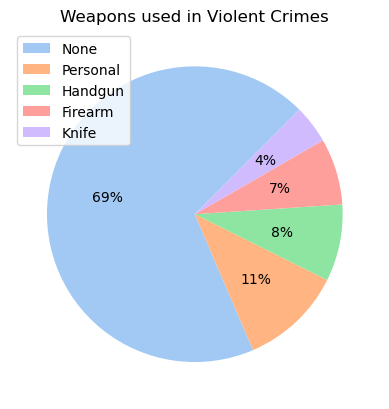

In [67]:
plt.pie(data[:5], labels=labels[:5], labeldistance=None, colors=colors, autopct="%.0f%%", startangle=45)
plt.legend()
plt.title("Weapons used in Violent Crimes")
plt.show()